In [3]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

from machine_learning.networks.gan import GAN, Z_dim, init_discriminator, init_generator

**data**

In [6]:
batch_size = 64
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()
# all_digits = np.concatenate([x_train, x_test])
X_train = X_train.astype("float32") / 255.0
X_train = np.reshape(X_train, (-1, 28, 28, 1))
train_set = tf.data.Dataset.from_tensor_slices(X_train)
train_set = train_set.shuffle(buffer_size=1024).batch(batch_size)

**model**

In [7]:
z_dim = 128
generator = init_generator(z_dim)
discriminator = init_discriminator(z_dim)

optimizer_g = keras.optimizers.Adam(learning_rate=0.0003)
optimizer_d = keras.optimizers.Adam(learning_rate=0.0003)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)

In [10]:
model = GAN(z_dim, generator, discriminator, optimizer_g, optimizer_d, loss_fn)
model.compile()

In [13]:
epochs = 10  # recommended 20
model.fit(train_set, epochs=epochs)

Epoch 1/10
938/938 [==============================] - 2115s 2s/step - discriminator: 0.5319 - generator: 1.1790
Epoch 2/10
938/938 [==============================] - 2203s 2s/step - discriminator: 0.3501 - generator: 2.2358
Epoch 3/10
938/938 [==============================] - 2249s 2s/step - discriminator: 0.3259 - generator: 2.1851
Epoch 4/10
938/938 [==============================] - 2255s 2s/step - discriminator: 0.6588 - generator: 0.8907
Epoch 5/10
938/938 [==============================] - 2226s 2s/step - discriminator: 0.6468 - generator: 0.9067
Epoch 6/10
938/938 [==============================] - 2223s 2s/step - discriminator: 0.6428 - generator: 0.9006
Epoch 7/10
938/938 [==============================] - 2245s 2s/step - discriminator: 0.6306 - generator: 0.9314
Epoch 8/10
938/938 [==============================] - 2244s 2s/step - discriminator: 0.6129 - generator: 0.9559
Epoch 9/10
938/938 [==============================] - 2260s 2s/step - discriminator: 0.5917 - generator:

**real images**

In [28]:
figsize = (12, 8)
n = 10

In [24]:
X = X_train[:n]
scores = model.discriminator(X)
np.mean(scores), np.std(scores)

(-0.1416792, 0.6250784)

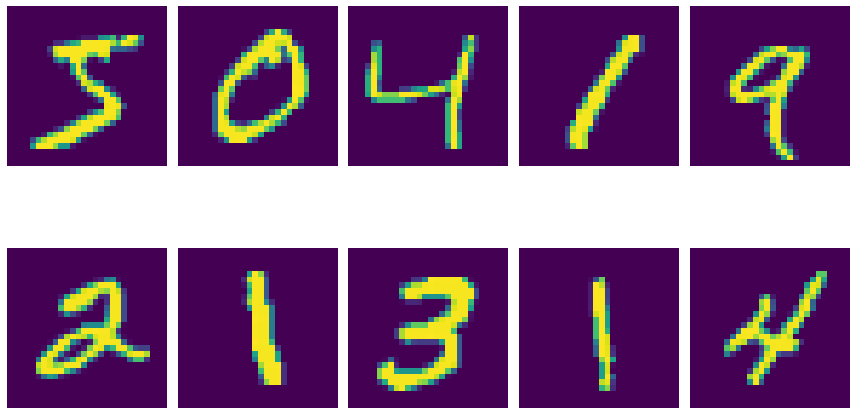

In [40]:
fig, axs = plt.subplots(2, 5, figsize=figsize, sharex=True, sharey=True)
for i in range(10):
  q, r = divmod(i, 5)
  x = X[i]
  axs[q, r].imshow(np.array(x).reshape(28,28))
  axs[q, r].axis('off')
plt.tight_layout()
plt.show()

**generated images**

In [26]:
Z = tf.random.normal((n, Z_dim))
X_hat = model.generator(Z)
scores = model.discriminator(X_hat)
np.mean(scores), np.std(scores)

(0.91179, 0.60966194)

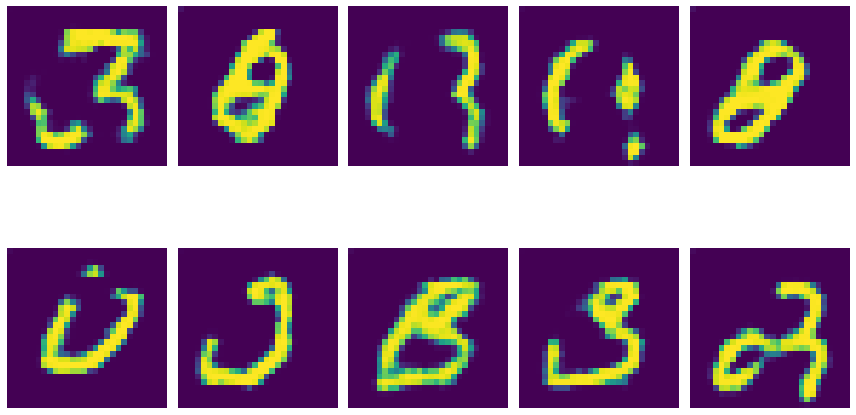

In [39]:
fig, axs = plt.subplots(2, 5, figsize=figsize, sharex=True, sharey=True)
for i in range(10):
  q, r = divmod(i, 5)
  x = X_hat[i]
  axs[q, r].imshow(np.array(x).reshape(28,28))
  axs[q, r].axis('off')
plt.tight_layout()
plt.show()